In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("gold_price.csv",parse_dates=True,index_col='Date')

In [5]:
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481
...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.910,1247.510,1378.970,1380.880
2019-08-28,1541.75,1537.15,1263.310,1258.770,1389.890,1387.430
2019-08-29,1536.65,1540.20,1260.510,1262.960,1387.290,1392.030


In [10]:
df['Return']=df['USD (PM)'].pct_change()*100
df['Lagged_Return']=df.Return.shift()
df=df.dropna()


In [12]:
train=df.loc['2001':'2008']
test=df.loc['2019']

In [15]:
X_train=train['Lagged_Return'].to_frame()
y_train=train['Return']
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Lagged_Return', ylabel='Return'>

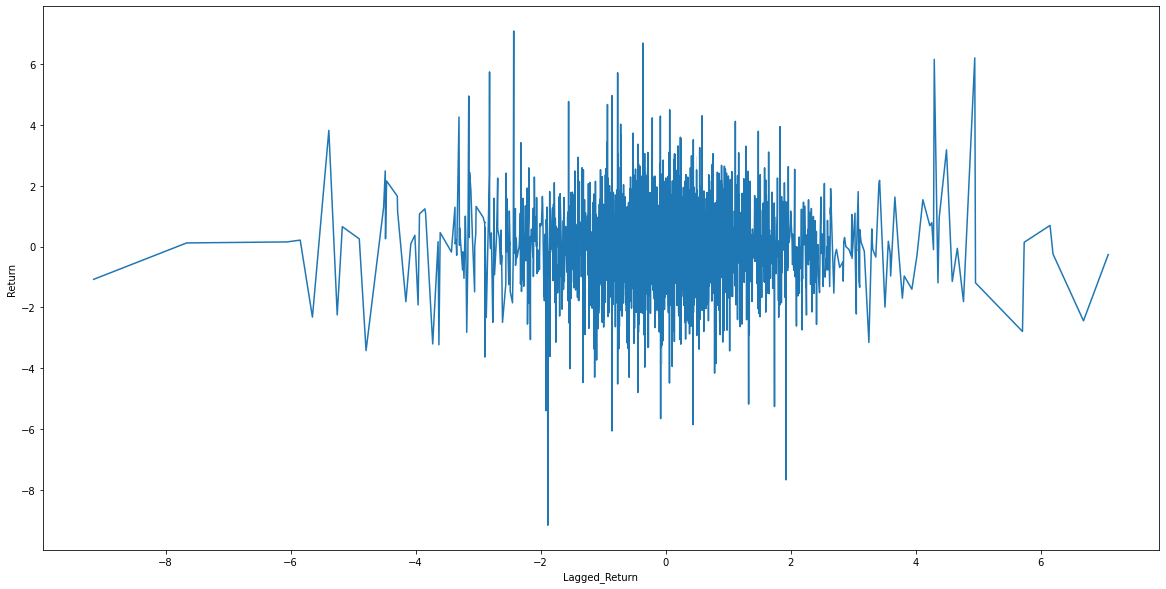

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Lagged_Return',y='Return',data=df)

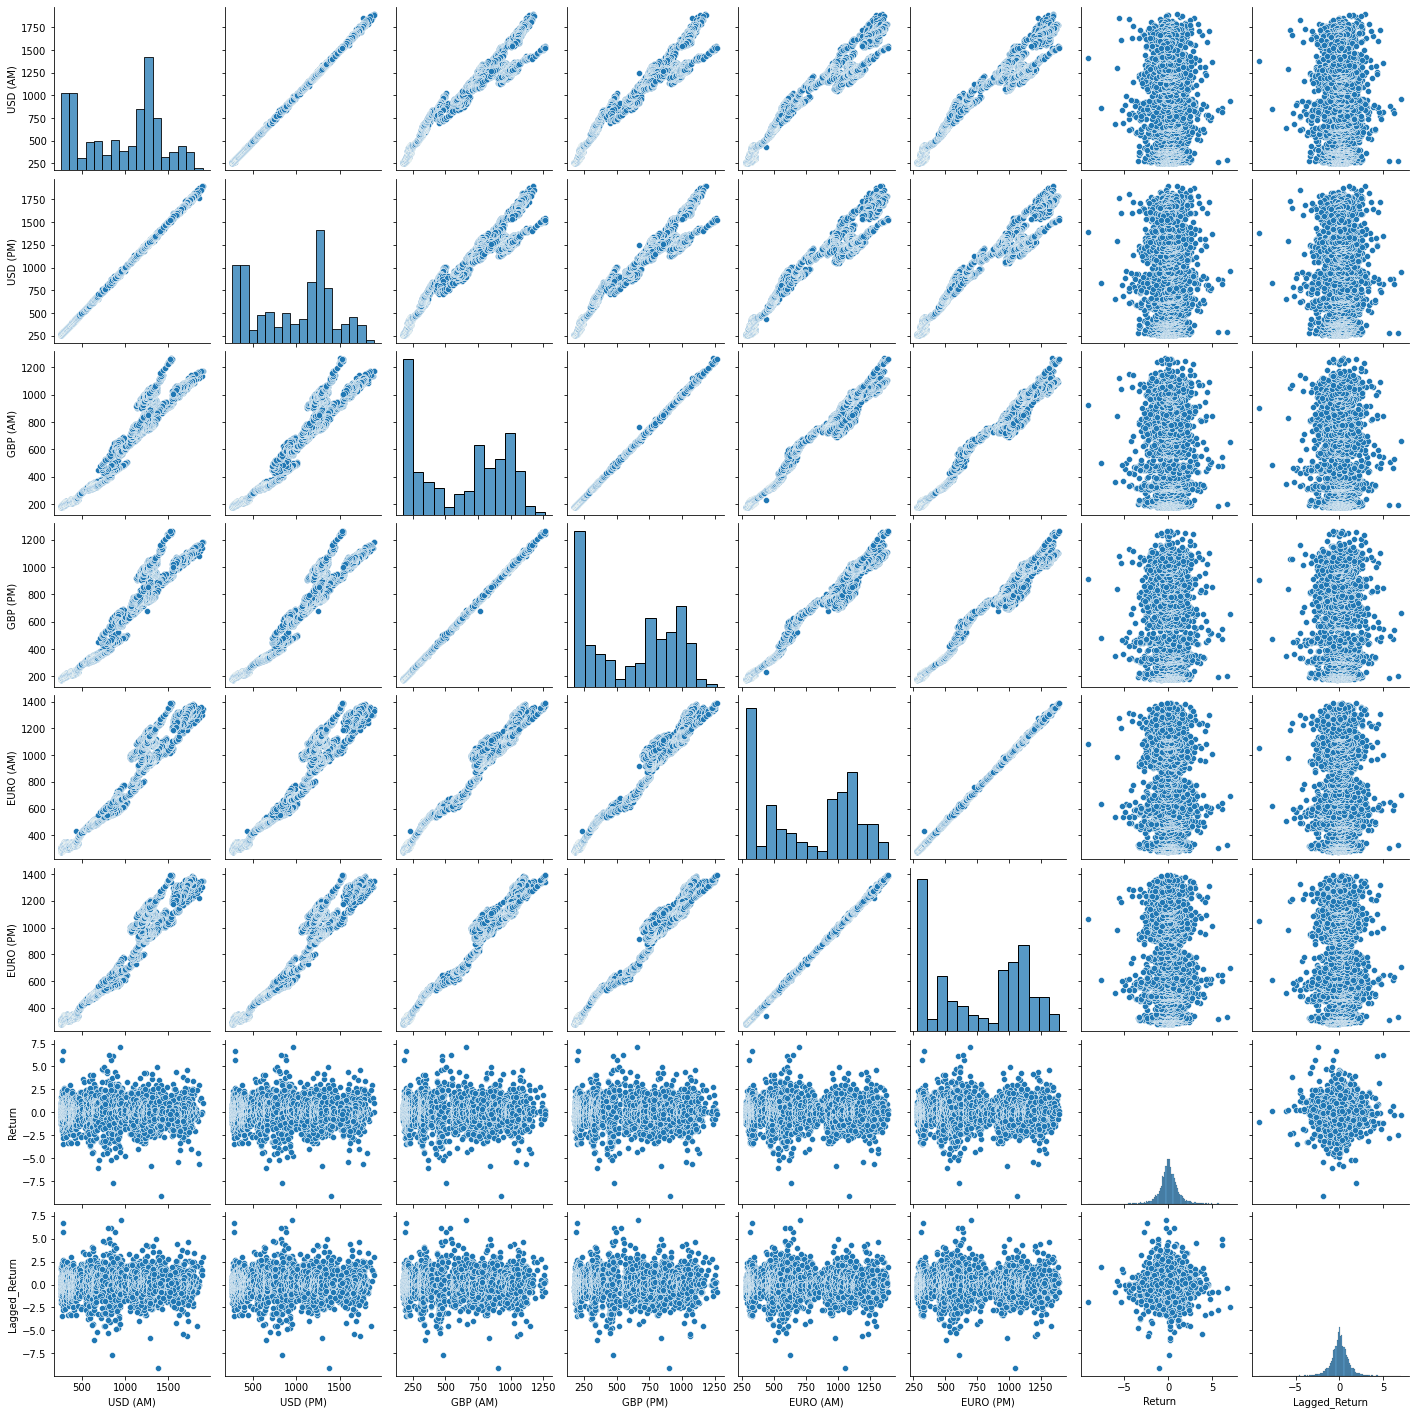

In [44]:
sns.pairplot(df)

<AxesSubplot:xlabel='Date', ylabel='Return'>

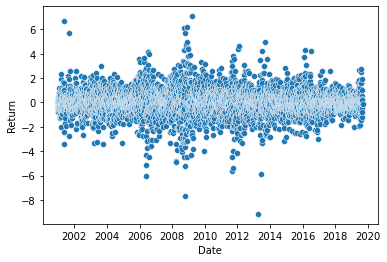

In [53]:
sns.scatterplot(x='Date',y='Return',data=df)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [37]:
out_of_sample_results = y_test.to_frame()

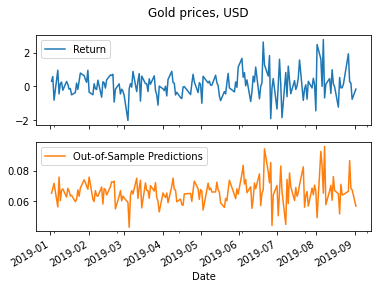

In [38]:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()